# Framingham - Coronary Heart Disease (CHD)

Objectives: 
* Missing Values Handling
* EDA - Heatmap
* EDA - DataFrame.style
* Decision Tree

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/master/framingham.csv")
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# Missing Values Handling

In [5]:
missing_rate = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'missing_rate': missing_rate})
missing_value_df.sort_values('missing_rate', inplace=True)
print(round(missing_value_df,2))

                     column_name  missing_rate
sex                          sex          0.00
age                          age          0.00
currentSmoker      currentSmoker          0.00
prevalentStroke  prevalentStroke          0.00
prevalentHyp        prevalentHyp          0.00
diabetes                diabetes          0.00
sysBP                      sysBP          0.00
diaBP                      diaBP          0.00
TenYearCHD            TenYearCHD          0.00
heartRate              heartRate          0.02
BMI                          BMI          0.45
cigsPerDay            cigsPerDay          0.68
totChol                  totChol          1.18
BPMeds                    BPMeds          1.25
education              education          2.48
glucose                  glucose          9.15


* Glucose has highest missing rate with more than 5%
* Considering to drop it if diabetes can explain glucose level

In [6]:
df['glucose'].unique()

array([ 77.,  76.,  70., 103.,  85.,  99.,  78.,  79.,  88.,  61.,  64.,
        84.,  nan,  72.,  89.,  65., 113.,  75.,  83.,  66.,  74.,  63.,
        87., 225.,  90.,  80., 100., 215.,  98.,  62.,  95.,  94.,  55.,
        82.,  93.,  73.,  45., 202.,  68.,  97., 104.,  96., 126., 120.,
       105.,  71.,  56.,  60., 117., 102.,  58.,  92., 109.,  86., 107.,
        54.,  67.,  69.,  57.,  91., 132., 150.,  59.,  81., 115., 140.,
       112., 118., 143., 114., 160., 110., 123., 108., 145., 122., 137.,
       106., 127., 205., 130., 101.,  47.,  53., 216., 163., 144., 116.,
       121., 172., 124., 111.,  40., 186., 223., 325.,  44., 156., 268.,
        50., 274., 292., 255., 136., 206., 131., 148., 297.,  43., 173.,
        48., 386., 155., 147., 170.,  52., 320., 254., 394., 270., 244.,
       183., 142., 119., 135., 167., 207., 129., 177., 250., 294., 166.,
       125., 332., 368., 348., 248., 370., 193., 191., 256., 235., 210.,
       260.])

In [7]:
df2 = df.loc[:,['diabetes','glucose']]
df2.groupby('diabetes').mean()

,glucose
diabetes,
0,79.487323
1,170.333333


* With diabetes, glucose level is 2.14x higher than without diabetes
* High blood sugar affects people who have diabetes

In [8]:
# drop glucose
df3 = df.drop(['glucose'], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [9]:
# remove missing
df4 = df3.dropna()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3989 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3989 non-null   int64  
 1   age              3989 non-null   int64  
 2   education        3989 non-null   float64
 3   currentSmoker    3989 non-null   int64  
 4   cigsPerDay       3989 non-null   float64
 5   BPMeds           3989 non-null   float64
 6   prevalentStroke  3989 non-null   int64  
 7   prevalentHyp     3989 non-null   int64  
 8   diabetes         3989 non-null   int64  
 9   totChol          3989 non-null   float64
 10  sysBP            3989 non-null   float64
 11  diaBP            3989 non-null   float64
 12  BMI              3989 non-null   float64
 13  heartRate        3989 non-null   float64
 14  TenYearCHD       3989 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 498.6 KB


# Exploratory Data Analysis (EDA)

### Heatmap

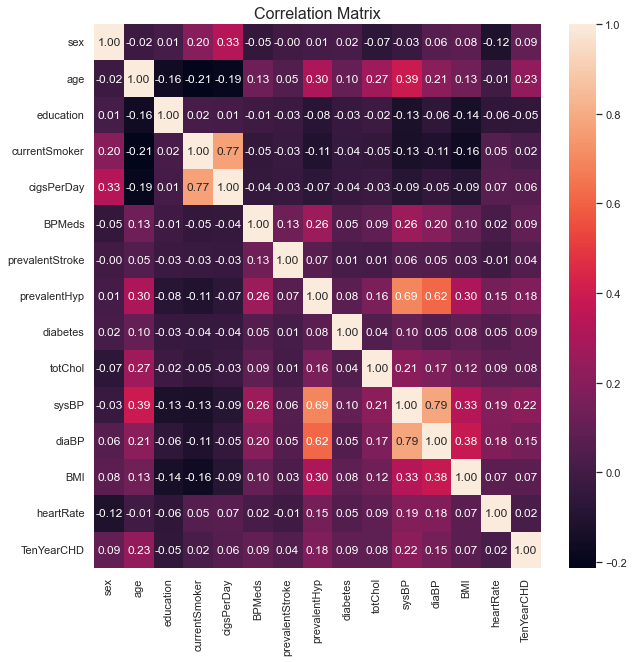

In [10]:
corr = df4.corr()
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Matrix', size=16)
plt.show()

Diseases associated with Aging

| ⬆️ Age | ➕ Correlation |
|-----|-----|
| Systolic Blood Pressure | 0.39 |
| Prevalence Hypertension | 0.30 |
| Total Cholesterol | 0.27 |
| 10-year Coronary Heart Disease | 0.23 |
| Diastolic Blood Pressure | 0.21 |
| Blood Pressure Medications | 0.13 |
| BMI | 0.13 |
| Prevalent Stroke | 0.05 |








### DataFrame.style

In [11]:
df4.loc[df4.diabetes == 0, 'diabetes'] = 0
df4.loc[df4.diabetes == 1, 'diabetes'] = 1

df5 = df4.groupby('diabetes').mean().T
df5.head(15).style.format({0: "{:.2f}", 1: "{:.2f}"})\
                  .background_gradient(cmap='Blues')

# https://towardsdatascience.com/style-pandas-dataframe-like-a-master-6b02bf6468b0

C:\Users\munmun\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


diabetes,0,1
sex,0.43,0.49
age,49.33,55.02
education,1.99,1.76
currentSmoker,0.49,0.37
cigsPerDay,9.09,6.35
BPMeds,0.03,0.08
prevalentStroke,0.01,0.01
prevalentHyp,0.30,0.52
totChol,236.28,248.76
sysBP,131.87,145.98


* With diabetes will have higher cholesterol, blood pressure, BMI, heart rate and coronary heart disease risk
* Person with no diabetes is generally younger, more educated and smoke more LOL😂

# Decision Tree

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import graphviz

High Correlation (more than 0.7)
* Systolic Blood Pressure & Diastolic Blood Pressure [0.79]
* Current Smoker & Cigarettes per day [0.77]

Target: 10-year Coronary Heart Disease

In [13]:
# drop diaBP and low correlation vars with 10-yr CHD
temp_df = df4.drop(['diaBP','currentSmoker','cigsPerDay','education','prevalentStroke','heartRate','BMI'], axis=1)

In [14]:
train_data = temp_df.drop('TenYearCHD', axis=1)
train_labels = temp_df['TenYearCHD']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.3, random_state=1)

In [16]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8421052631578947


In [18]:
columns = list(X_train.columns)
dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['No', 'Yes'], filled=True, rounded=True)

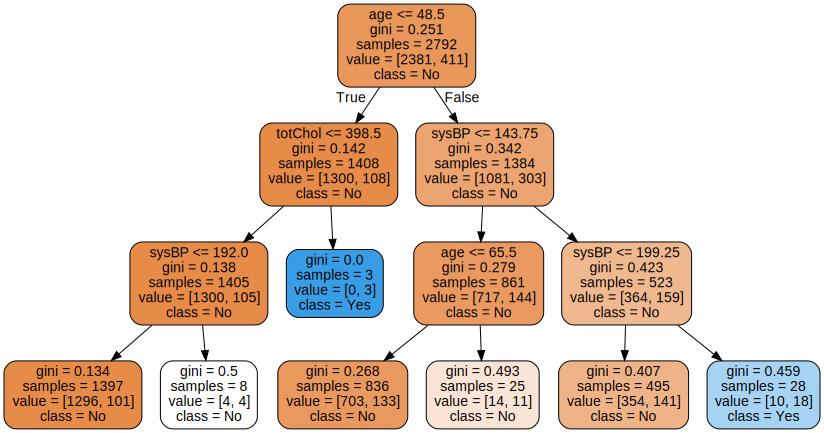

In [20]:
graph = graphviz.Source(dot_data)
graph


* Aged below 48.5 but high cholesterol (>398.5) is deemed to have highest risk (3 out of 3)
* Aged above 48.5 with high blood pressure (>199.25) is deemed to have higher risk (18 out of 28)
* Aged below 48.5 with lower cholesterol (<=398.5) but with high blood pressure (>192) is risky (4 out of 8)
* Although a person with lower blood pressure (<=143.75), the person aged above 65.5 is also risky (11 out of 25)

`Determinants of 10-year CHD - Age, Blood Pressure and Cholesterol`